In [113]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
#Load the dataset
song = pd.read_json('song.json')

In [115]:
#Take a look at the first rows of the dataset
song.head(5)

,id,song_played,time_played,user_id,user_sign_up_date,user_state
0,GOQMMKSQQH,Hey Jude,2015-06-11 21:51:35,122,2015-05-16,Louisiana
1,HWKKBQKNWI,We Can Work It Out,2015-06-06 16:49:19,3,2015-05-01,Ohio
2,DKQSXVNJDH,Back In the U.S.S.R.,2015-06-14 02:11:29,35,2015-05-04,New Jersey
3,HLHRIDQTUW,P.s. I Love You,2015-06-08 12:26:10,126,2015-05-16,Illinois
4,SUKJCSBCYW,Sgt. Pepper's Lonely Hearts Club Band,2015-06-28 14:57:00,6,2015-05-01,New Jersey


In [116]:
#Examine the dataset information. Fortunately, there is no need to deal with missing data here.
song.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 6 columns):
id                   4000 non-null object
song_played          4000 non-null object
time_played          4000 non-null object
user_id              4000 non-null int64
user_sign_up_date    4000 non-null object
user_state           4000 non-null object
dtypes: int64(1), object(5)
memory usage: 218.8+ KB


In [117]:
#Two datetime data columns are stored as object. Hence, it might be useful later to convert them back to
#datetime datatype.

song['time_played'] = pd.to_datetime(song['time_played'])
song['user_sign_up_date'] = pd.to_datetime(song['user_sign_up_date'])

In [118]:
#Take a look into the time period that this data were collected.
song['time_played'].describe()

count                    4000
unique                   3997
top       2015-06-06 08:42:20
freq                        2
first     2015-06-01 05:02:54
last      2015-06-28 23:46:06
Name: time_played, dtype: object

In [119]:
#There are 4000 times songs played. That does not mean the company offer 4000 unique songs and
# it has reached 4000 user throughout the nation. It's necessary to examine how many unique users, songs
# we have. There are 196 users across 41 states. These 196 users listen to 100 unique songs in total 4000 times.
# These numbers make sense, so we don't need to drop any rows for now.
song.nunique()

id                   4000
song_played           100
time_played          3997
user_id               196
user_sign_up_date      20
user_state             41
dtype: int64

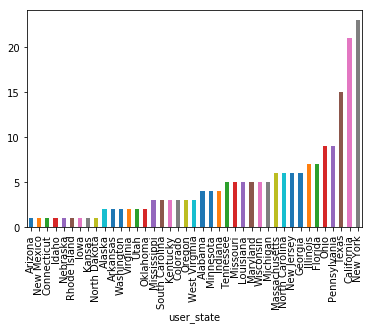

In [120]:
#1. To find the number of (unique!) users at each state. I group the dataset by the state. Then, I find the
# number of unique values corresponding to user_id. 
# New York, California, and Texas top the list. However, nine states including Arizona, New Mexico, Connecticut,
# Idaho, Nebraska, Rhode Island, Iowa, Kansas, and North Dakota bottom the list with only one user.
# This indeed makes sense because the company is a start-up. It seems that the company mainly focuses on
# big states/cities.
user_by_state = song.groupby('user_state')['user_id'].nunique().sort_values()
user_by_state.plot(kind='bar')

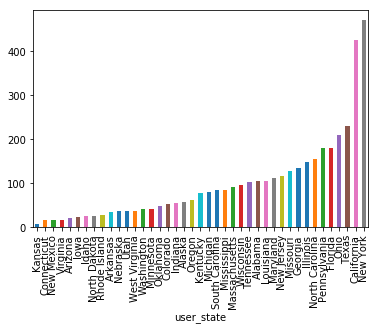

In [121]:
#2. To identify the top and bottom three state in terms of user engagement, I 
# will compute total listen count divided by the number of user in every state. The metric
# would reduce the imbalance among states caused by different user sizes. 

#First, I compute the total listen count by every state. New York, California, and
# Texas top the list. These states have the highest number of users, so the result is
# quite unsurprising.

song_by_state = song.groupby('user_state')['song_played'].count().sort_values()
song_by_state.plot(kind='bar')

In [122]:
# I define user engagement metric:

user_engagement = song_by_state / user_by_state

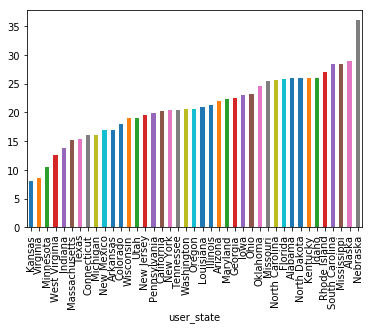

In [123]:
# Though NY, CA, and TX have highest number of users and total listen counts, user engagement
# in Nebraska, Alaska, and Mississippi are the highest. Kansas, Virginia, and Minnesota
# have lowest user engagement level.

user_engagement.sort_values().plot(kind='bar')

In [124]:
# Taking a look at the three states with highest user engagement, I see that
# there are very few users(one in Nebraska, two in Alaska, three in Mississippi).
# However, these users are very active. That indicates opportunity to develop business
# there. Also, active users are very important to developing our products in three ways.

# 1st: They can provide us with helpful insights in where we can imporve out services.

# 2nd: They can recommend our product to their friends.

# 3rd (very important): They play a very important role in imporving our recommender
# system based on trust customers. We can weight their preferences higher to improve our
# recommendation.

# => Marketing team should maintain good relationship with customers in these states.
# => Marketing team should also pay more attention to Kansas, Virginia, and Minnesota to
# figure out the reasons for low user engagement in these states to improve the product. 

print(user_by_state.loc['Nebraska'], user_engagement.loc['Nebraska'])
print(user_by_state.loc['Alaska'], user_engagement.loc['Alaska'])
print(user_by_state.loc['Mississippi'], user_engagement.loc['Mississippi'])

print(user_by_state.loc['Kansas'], user_engagement.loc['Kansas'])
print(user_by_state.loc['Virginia'], user_engagement.loc['Virginia'])
print(user_by_state.loc['Minnesota'], user_engagement.loc['Minnesota'])

1 36.0
2 29.0
3 28.333333333333332
1 8.0
2 8.5
4 10.5


In [125]:
# To find first user to sign up in every state. I sort users based on the sign-up time and group the data by state. 
# The list first row of every state is the list of first users.

first_user_by_state = song[['user_state', 'user_sign_up_date', 'user_id']].sort_values('user_sign_up_date').groupby('user_state').first()
first_user_by_state

,user_sign_up_date,user_id
user_state,,
Alabama,2015-05-01,5
Alaska,2015-05-12,106
Arizona,2015-05-12,105
Arkansas,2015-05-08,78
California,2015-05-04,39
Colorado,2015-05-19,173
Connecticut,2015-05-16,127
Florida,2015-05-04,41
Georgia,2015-05-02,20


In [126]:
song2 = song[['song_played', 'user_id']].groupby('user_id')['song_played'].value_counts()

In [127]:
song3 = song2.to_frame().rename(index=str, columns={"song_played": "listen_count"})

In [128]:
song_recommender = song3.reset_index()
song_recommender.head(3)

,user_id,song_played,listen_count
0,1,Here Comes The Sun,2
1,1,Birthday,1
2,1,Can't Buy Me Love,1


In [129]:
ratings=pd.pivot_table(song_recommender,index='user_id',columns='song_played',values='listen_count').fillna(0)
ratings

song_played,A Day In The Life,A Hard Day's Night,A Saturday Club Xmas/Crimble Medley,ANYTIME AT ALL,Across The Universe,All My Loving,All You Need Is Love,And Your Bird Can Sing,BAD BOY,BALLAD OF JOHN AND YOKO,...,We Can Work It Out,When I'm 64,While My Guitar Gently Weeps,Wild Honey Pie,With a Little Help From My Friends,YOUR MOTHER SHOULD KNOW,Yellow Submarine,Yesterday,You Never Give Me Your Money,You're Going To Lose That Girl
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
106,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [130]:
def pearson(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

In [131]:
pearson(ratings['Yesterday'], ratings['All My Loving'])

0.03246126316961488

In [132]:
def get_similar_songs(song_played, ratings, num):
    reviews = []
    for title in ratings.columns:
        if title == song_played:
            continue
        cor = pearson(ratings[song_played], ratings[title])
        if np.isnan(cor):
            continue
        else:
            reviews.append((title, cor))
    reviews.sort(key = lambda tup: tup[1], reverse = True)
    
    return reviews[:num]

In [133]:
get_similar_songs('Yesterday', ratings, 5)

[("I'm Down", 0.2588487011401708),
 ('Reprise / Day in the Life', 0.24624705460800084),
 ('Sun King', 0.22045883658504314),
 ('We Can Work It Out', 0.21033708637277365),
 ('While My Guitar Gently Weeps', 0.20973459289934365)]

In [134]:
songs = pd.DataFrame(ratings.columns)

In [135]:
songs.head(3)

,song_played
0,A Day In The Life
1,A Hard Day's Night
2,A Saturday Club Xmas/Crimble Medley


In [136]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tapham18/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [137]:
sid = SentimentIntensityAnalyzer()
sentiment = songs['song_played'].apply(lambda text: sid.polarity_scores(text)).apply(pd.Series)['compound'] 

In [138]:
sentiment.head(5)

0    0.0000
1   -0.1027
2    0.0000
3    0.0000
4    0.0000
Name: compound, dtype: float64

In [139]:
songs = pd.concat([songs, sentiment], axis=1)

In [140]:
vect = TfidfVectorizer(max_df=0.5, analyzer='word')

In [141]:
X = vect.fit_transform(songs['song_played'])

In [143]:
songs_2 = pd.concat([songs, pd.DataFrame(X.toarray())], axis=1)

In [144]:
songs_2.head(5)

,song_played,compound,0,1,2,3,4,5,6,7,...,203,204,205,206,207,208,209,210,211,212
0,A Day In The Life,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,A Hard Day's Night,-0.1027,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,A Saturday Club Xmas/Crimble Medley,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.459404,0.0,0.0,0.0,0.0,0.0
3,ANYTIME AT ALL,0.0000,0.0,0.000000,0.519218,0.0,0.0,0.604323,0.604323,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Across The Universe,0.0000,0.0,0.652488,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [145]:
songs_2.to_csv('songs_2')